## Chargements des données

In [13]:
import pandas
import numpy as np

In [14]:
def open_otto_csv(file):
	return pandas.read_csv(file, sep=',')

In [15]:
files = {"train": "./res/train.csv", "test": "./res/test.csv"}
files["train"] = open_otto_csv(files["train"])
files["test"] = open_otto_csv(files["test"])

In [16]:
def get_x_y(pandas_data_frame):
	y = pandas_data_frame["target"]
	x = pandas_data_frame.drop(columns=["id", "target"])
	return x, y

In [17]:
train_x, train_y = get_x_y(files["train"])

## Quelques observations sur les données

In [18]:
train_x.info(max_cols=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Columns: 93 entries, feat_1 to feat_93
dtypes: int64(93)
memory usage: 43.9 MB


In [22]:
nbre_example = len(train_x)
class_list = set(train_y)
nbre_class = len(class_list)
print("le nombre d'exemples dans le dataset est de : ", nbre_example)
print("le nombre de classes différentes est de :", nbre_class)
print(class_list)

le nombre d'exemples dans le dataset est de :  61878
le nombre de classes différentes est de : 9
{'Class_6', 'Class_8', 'Class_4', 'Class_5', 'Class_7', 'Class_9', 'Class_1', 'Class_2', 'Class_3'}


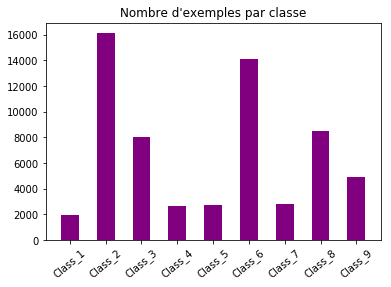

In [48]:
import matplotlib.pyplot as plt
import pylab

def mk_dict_labels(all_y):
    values = []
    count_labels = {}
    for row in all_y.values:
        values.append(row)
    for l in values:
        if l in count_labels:
            count_labels[l] += 1
        else:
            count_labels[l] = 1
    return count_labels

def plot_hist(labels):
    x = [i for i in range(len(count_labels))]
    x_name = [i for i in count_labels.keys()]
    y = [i for i in count_labels.values()]
    plt.bar(x, y, 0.5, color='purple')
    plt.title("Nombre d'exemples par classe")
    pylab.xticks(x, x_name, rotation=40)
    plt.show()
    
count_labels = mk_dict_labels(train_y)
plot_hist(count_labels)    

In [ ]:
from sklearn.model_selection import train_test_split

# Split des données en partition de train et partition de validation
train_x, train_vx, train_y, train_vy = train_test_split(train_x, train_y, test_size=0.2, train_size=0.8, random_state=42)

In [6]:
from sklearn.metrics import f1_score

def evaluate_model(true_y, y_pred):
    score = f1_score(true_y, y_pred, average = 'weighted')
    tmp_y=np.asarray(true_y)
    print("f1_score precision : (version sklearn)", score)
    print("evaluation (version Sam) : ")
    print(tmp_y[tmp_y==y_pred].shape[0], "/", y_pred.shape[0])
    print("Precision : %f" % (tmp_y[tmp_y==y_pred].shape[0] / y_pred.shape[0]))

## Comparatif sur quelques classifiers différents

### Classifier : SVM

In [91]:
import sklearn.svm as svm

svc = svm.SVC(max_iter = 1000)
svc.fit(train_x, train_y)

y_pred2 = svc.predict(train_vx)

evaluate_model(train_vy, y_pred2)

/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


f1_score precision : (version sklearn) 0.7168810963548745
evaluation version Sam : 
8872 / 12376
Precision : 0.716871


### Classifier : K-NN

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(train_x, train_y)

y_pred3 = knn.predict(train_vx)

evaluate_model(train_vy, y_pred3)

f1_score precision : (version sklearn) 0.7739562191425366
evaluation (version Sam) : 
9662 / 12376
Precision : 0.780705


### Classifier : Naive Bayes

In [8]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(train_x, train_y)

y_pred4 = nb.predict(train_vx)

evaluate_model(train_vy, y_pred4)

f1_score precision : (version sklearn) 0.6286302230265768
evaluation (version Sam) : 
7684 / 12376
Precision : 0.620879
